In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np

In [ ]:
df = pd.read_csv('mission_launches.csv')

In [ ]:
df.head()

In [ ]:
df.shape

(4324, 9)

In [ ]:
df.groupby(['Organisation'])

In [ ]:
df

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


In [ ]:
df.isna()

In [ ]:
clean_df = df.dropna()

In [ ]:
clean_df.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success
5,5,5,CASC,"LC-9, Taiyuan Satellite Launch Center, China",2020-07-25 03:13:00+00:00,"Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success


In [ ]:
chars_to_remove = [',']
columns_to_clean = ['Price']

for col in columns_to_clean:
    for char in chars_to_remove:
        # Replace each character with an empty string
        clean_df[col] = clean_df[col].astype(str).str.replace(char, "")
    # Convert column to a numeric data type
    clean_df[col] = pd.to_numeric(clean_df[col])

<ipython-input-69-b67e1f292154>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df[col] = clean_df[col].astype(str).str.replace(char, "")
<ipython-input-69-b67e1f292154>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df[col] = pd.to_numeric(clean_df[col])


In [ ]:
clean_df.dtypes

Unnamed: 0.1        int64
Unnamed: 0          int64
Organisation       object
Location           object
Date               object
Detail             object
Rocket_Status      object
Price             float64
Mission_Status     object
dtype: object

In [ ]:
clean_df['Price'].idxmax()

1916

In [ ]:
clean_df.loc[1916]

Unnamed: 0.1                                              1916
Unnamed: 0                                                1916
Organisation                                         RVSN USSR
Location          Site 110/37, Baikonur Cosmodrome, Kazakhstan
Date                                Tue Nov 15, 1988 03:00 UTC
Detail                                  Energiya/Buran | Buran
Rocket_Status                                    StatusRetired
Price                                                   5000.0
Mission_Status                                         Success
Name: 1916, dtype: object

In [ ]:
clean_df['Price'].idxmin()

26

In [ ]:
clean_df.loc[26]

Unnamed: 0.1                                          26
Unnamed: 0                                            26
Organisation                                        CASC
Location          Xichang Satellite Launch Center, China
Date                          Fri May 29, 2020 20:13 UTC
Detail                   Long March 11 | XJS-G and XJS-H
Rocket_Status                               StatusActive
Price                                                5.3
Mission_Status                                   Success
Name: 26, dtype: object

In [ ]:
most_expensive = clean_df.sort_values('Price', ascending = False)

In [ ]:
most_expensive[['Organisation', 'Date', 'Detail', 'Price']].head()

,Organisation,Date,Detail,Price
1916,RVSN USSR,"Tue Nov 15, 1988 03:00 UTC",Energiya/Buran | Buran,5000.0
2000,RVSN USSR,"Fri May 15, 1987 17:30 UTC",Energiya/Polyus | Polyus Space Station,5000.0
3545,NASA,"Wed Jul 16, 1969 13:32 UTC",Saturn V | Apollo 11,1160.0
3603,NASA,"Sat Dec 21, 1968 12:51 UTC",Saturn V | Apollo 8,1160.0
3475,NASA,"Sat Apr 11, 1970 19:13 UTC",Saturn V | Apollo 13,1160.0


In [ ]:
least_expensive = clean_df.sort_values('Price')
least_expensive[['Organisation', 'Date', 'Detail', 'Price']].head()

,Organisation,Date,Detail,Price
102,CASC,"Thu Sep 19, 2019 06:42 UTC",Long March 11 | Zhuhai-1 Group 03,5.3
281,CASC,"Fri Jan 19, 2018 04:12 UTC","Long March 11 | Jilin-1 07, 08 & Others",5.3
26,CASC,"Fri May 29, 2020 20:13 UTC",Long March 11 | XJS-G and XJS-H,5.3
176,CASC,"Fri Dec 21, 2018 23:51 UTC",Long March 11 | Hongyun-1,5.3
487,CASC,"Fri Sep 25, 2015",Long March 11 | Pujian 1 & Others,5.3


In [ ]:
clean_df.groupby('Organisation').head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
5,5,5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success
...,...,...,...,...,...,...,...,...,...
3554,3554,3554,US Air Force,"SLC-4W, Vandenberg AFB, California, USA","Tue Jun 03, 1969 16:49 UTC",Titan IIIB | OPS 1077,StatusRetired,59.0,Success
3563,3563,3563,US Air Force,"SLC-4W, Vandenberg AFB, California, USA","Tue Apr 15, 1969 17:30 UTC",Titan IIIB | OPS 5310,StatusRetired,59.0,Success
3583,3583,3583,US Air Force,"SLC-4W, Vandenberg AFB, California, USA","Tue Mar 04, 1969 19:30 UTC",Titan IIIB | OPS 4248,StatusRetired,59.0,Success
3595,3595,3595,US Air Force,"SLC-4W, Vandenberg AFB, California, USA","Wed Jan 22, 1969 19:10 UTC",Titan IIIB | OPS 7585,StatusRetired,59.0,Success


In [ ]:
organisation_df = clean_df[['Organisation', 'Price']]

In [ ]:
organisation_df.head()

,Organisation,Price
0,SpaceX,50.0
1,CASC,29.75
3,Roscosmos,65.0
4,ULA,145.0
5,CASC,64.68


In [ ]:
organisation_df.dtypes

Organisation    object
Price           object
dtype: object

In [ ]:
clean_df['Date'] = pd.to_datetime(clean_df.Date) 

<ipython-input-32-672f8fa9b73b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Date'] = pd.to_datetime(clean_df.Date)


In [ ]:
clean_df.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.0,Success
5,5,5,CASC,"LC-9, Taiyuan Satellite Launch Center, China",2020-07-25 03:13:00+00:00,"Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success


In [ ]:
reshaped_df = clean_df[['Organisation', 'Date']]
reshaped_df.head()

,Organisation,Date
0,SpaceX,"Fri Aug 07, 2020 05:12 UTC"
1,CASC,"Thu Aug 06, 2020 04:01 UTC"
3,Roscosmos,"Thu Jul 30, 2020 21:25 UTC"
4,ULA,"Thu Jul 30, 2020 11:50 UTC"
5,CASC,"Sat Jul 25, 2020 03:13 UTC"


In [ ]:
reshaped_df1 = clean_df[['Organisation', 'Date']]
reshaped_df1.head()

,Organisation,Date
0,SpaceX,2020-08-07 05:12:00+00:00
1,CASC,2020-08-06 04:01:00+00:00
3,Roscosmos,2020-07-30 21:25:00+00:00
4,ULA,2020-07-30 11:50:00+00:00
5,CASC,2020-07-25 03:13:00+00:00


In [ ]:
reshaped_df2 = clean_df[['Organisation', 'Date', 'Price']]
reshaped_df2.head()

,Organisation,Date,Price
0,SpaceX,2020-08-07 05:12:00+00:00,50.0
1,CASC,2020-08-06 04:01:00+00:00,29.75
3,Roscosmos,2020-07-30 21:25:00+00:00,65.0
4,ULA,2020-07-30 11:50:00+00:00,145.0
5,CASC,2020-07-25 03:13:00+00:00,64.68


In [ ]:
pivot_df = reshaped_df.pivot(columns = 'Organisation', values = 'Date')
pivot_df.tail()

Organisation,Arianespace,Boeing,CASC,EER,ESA,Eurockot,ExPace,ILS,ISRO,JAXA,...,Northrop,RVSN USSR,Rocket Lab,Roscosmos,Sandia,SpaceX,ULA,US Air Force,VKS RF,Virgin Orbit
3855,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,1966-07-29 18:43:00+00:00,NaT,NaT
3971,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,1965-05-06 15:00:00+00:00,NaT,NaT
3993,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,1965-02-11 15:19:00+00:00,NaT,NaT
4000,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,1964-12-10 16:52:00+00:00,NaT,NaT
4020,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,1964-09-01 15:00:00+00:00,NaT,NaT


In [ ]:
reshaped_df.sort_values(by = 'Organisation')

,Organisation,Date
660,Arianespace,2011-12-17 02:03:00+00:00
765,Arianespace,2009-07-01 19:52:00+00:00
758,Arianespace,2009-08-21 22:09:00+00:00
751,Arianespace,2009-10-01 21:59:00+00:00
747,Arianespace,2009-10-29 20:00:00+00:00
...,...,...
979,VKS RF,2004-11-08 18:29:00+00:00
435,VKS RF,2016-06-04 14:00:00+00:00
198,VKS RF,2018-11-03 20:17:00+00:00
948,VKS RF,2005-08-26 18:34:00+00:00


In [ ]:
reshaped_df['Date'] = pd.to_datetime(reshaped_df['Date'], utc = True)

<ipython-input-38-e4e38558a285>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reshaped_df['Date'] = pd.to_datetime(reshaped_df['Date'], utc = True)


In [ ]:
reshaped_df['Date'].dtypes

datetime64[ns, UTC]

In [ ]:
reshaped_df.sort_values(by = 'Date')

,Organisation,Date
4020,US Air Force,1964-09-01 15:00:00+00:00
4000,US Air Force,1964-12-10 16:52:00+00:00
3993,US Air Force,1965-02-11 15:19:00+00:00
3971,US Air Force,1965-05-06 15:00:00+00:00
3855,US Air Force,1966-07-29 18:43:00+00:00
...,...,...
5,CASC,2020-07-25 03:13:00+00:00
4,ULA,2020-07-30 11:50:00+00:00
3,Roscosmos,2020-07-30 21:25:00+00:00
1,CASC,2020-08-06 04:01:00+00:00


In [ ]:
reshaped_df1['Date'] = reshaped_df1['Date'].astype(str).str[0:7]

<ipython-input-41-5e62c7be1037>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reshaped_df1['Date'] = reshaped_df1['Date'].astype(str).str[0:7]


In [ ]:
reshaped_df1.head()

,Organisation,Date
0,SpaceX,2020-08
1,CASC,2020-08
3,Roscosmos,2020-07
4,ULA,2020-07
5,CASC,2020-07


In [ ]:
reshaped_df1.sort_values(by = 'Date')

,Organisation,Date
4020,US Air Force,1964-09
4000,US Air Force,1964-12
3993,US Air Force,1965-02
3971,US Air Force,1965-05
3855,US Air Force,1966-07
...,...,...
14,CASC,2020-07
15,Rocket Lab,2020-07
9,JAXA,2020-07
1,CASC,2020-08


In [ ]:
date_count = reshaped_df1['Date'].value_counts()

In [ ]:
date_count

2020-07    12
2017-06    12
2018-01    11
2018-12    11
2018-11    10
           ..
1996-09     1
1996-08     1
1996-07     1
1996-06     1
1964-09     1
Name: Date, Length: 388, dtype: int64

In [ ]:
reshaped_df2['Date'] = reshaped_df2['Date'].astype(str).str[0:7]
reshaped_df2.head()

<ipython-input-142-770ee7c98485>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reshaped_df2['Date'] = reshaped_df2['Date'].astype(str).str[0:7]


,Organisation,Date,Price
0,SpaceX,2020-08,50.0
1,CASC,2020-08,29.75
3,Roscosmos,2020-07,65.0
4,ULA,2020-07,145.0
5,CASC,2020-07,64.68


In [ ]:
reshaped_df3 = reshaped_df2.pivot_table(index='Date', columns='Organisation', values='Price', aggfunc='sum')

In [ ]:
for col in reshaped_df3:
  reshaped_df3[col] = reshaped_df3[col].fillna(0)


In [ ]:
reshaped_df3

Organisation,Arianespace,Boeing,CASC,EER,ESA,Eurockot,ExPace,ILS,ISRO,JAXA,...,Northrop,RVSN USSR,Rocket Lab,Roscosmos,Sandia,SpaceX,ULA,US Air Force,VKS RF,Virgin Orbit
Date,,,,,,,,,,,,,,,,,,,,,
1964-09,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,63.23,0,0
1964-12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,63.23,0,0
1965-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,63.23,0,0
1965-05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,63.23,0,0
1966-07,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,59.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04,0,0,29.15,0,0,0,0,0,0,0,...,0,0,0,48.548.5,0,50.0,0,0,0,0
2020-05,0,0,29.755.3,0,0,0,0,0,0,0,...,0,0,0,0,0,50.0,120.0,0,0,12.0
2020-06,0,0,29.1529.7530.8,0,0,0,0,0,0,0,...,0,0,7.5,0,0,50.050.050.0,0,0,0,0


In [ ]:
clean_df.groupby(['Organisation'])
clean_df.dtypes


Unnamed: 0.1        int64
Unnamed: 0          int64
Organisation       object
Location           object
Date               object
Detail             object
Rocket_Status      object
Price             float64
Mission_Status     object
dtype: object

In [ ]:
clean_df = clean_df[['Organisation', 'Price']]
clean_df.dtypes

Organisation     object
Price           float64
dtype: object

In [ ]:
clean_df = clean_df.sort_values('Price')

,Organisation,Price
102,CASC,5.3
281,CASC,5.3
26,CASC,5.3
176,CASC,5.3
487,CASC,5.3
...,...,...
3584,NASA,1160.0
3511,NASA,1160.0
3545,NASA,1160.0
2000,RVSN USSR,5000.0


In [ ]:
price_comparison = organisation_df.groupby('Organisation').sum(). sort_values('Price', ascending = False)
price_comparison

,Price
Organisation,
NASA,76280.00
Arianespace,16345.00
ULA,14798.00
RVSN USSR,10000.00
CASC,6340.26
SpaceX,5444.00
Northrop,3930.00
MHI,3532.50
ISRO,2177.00


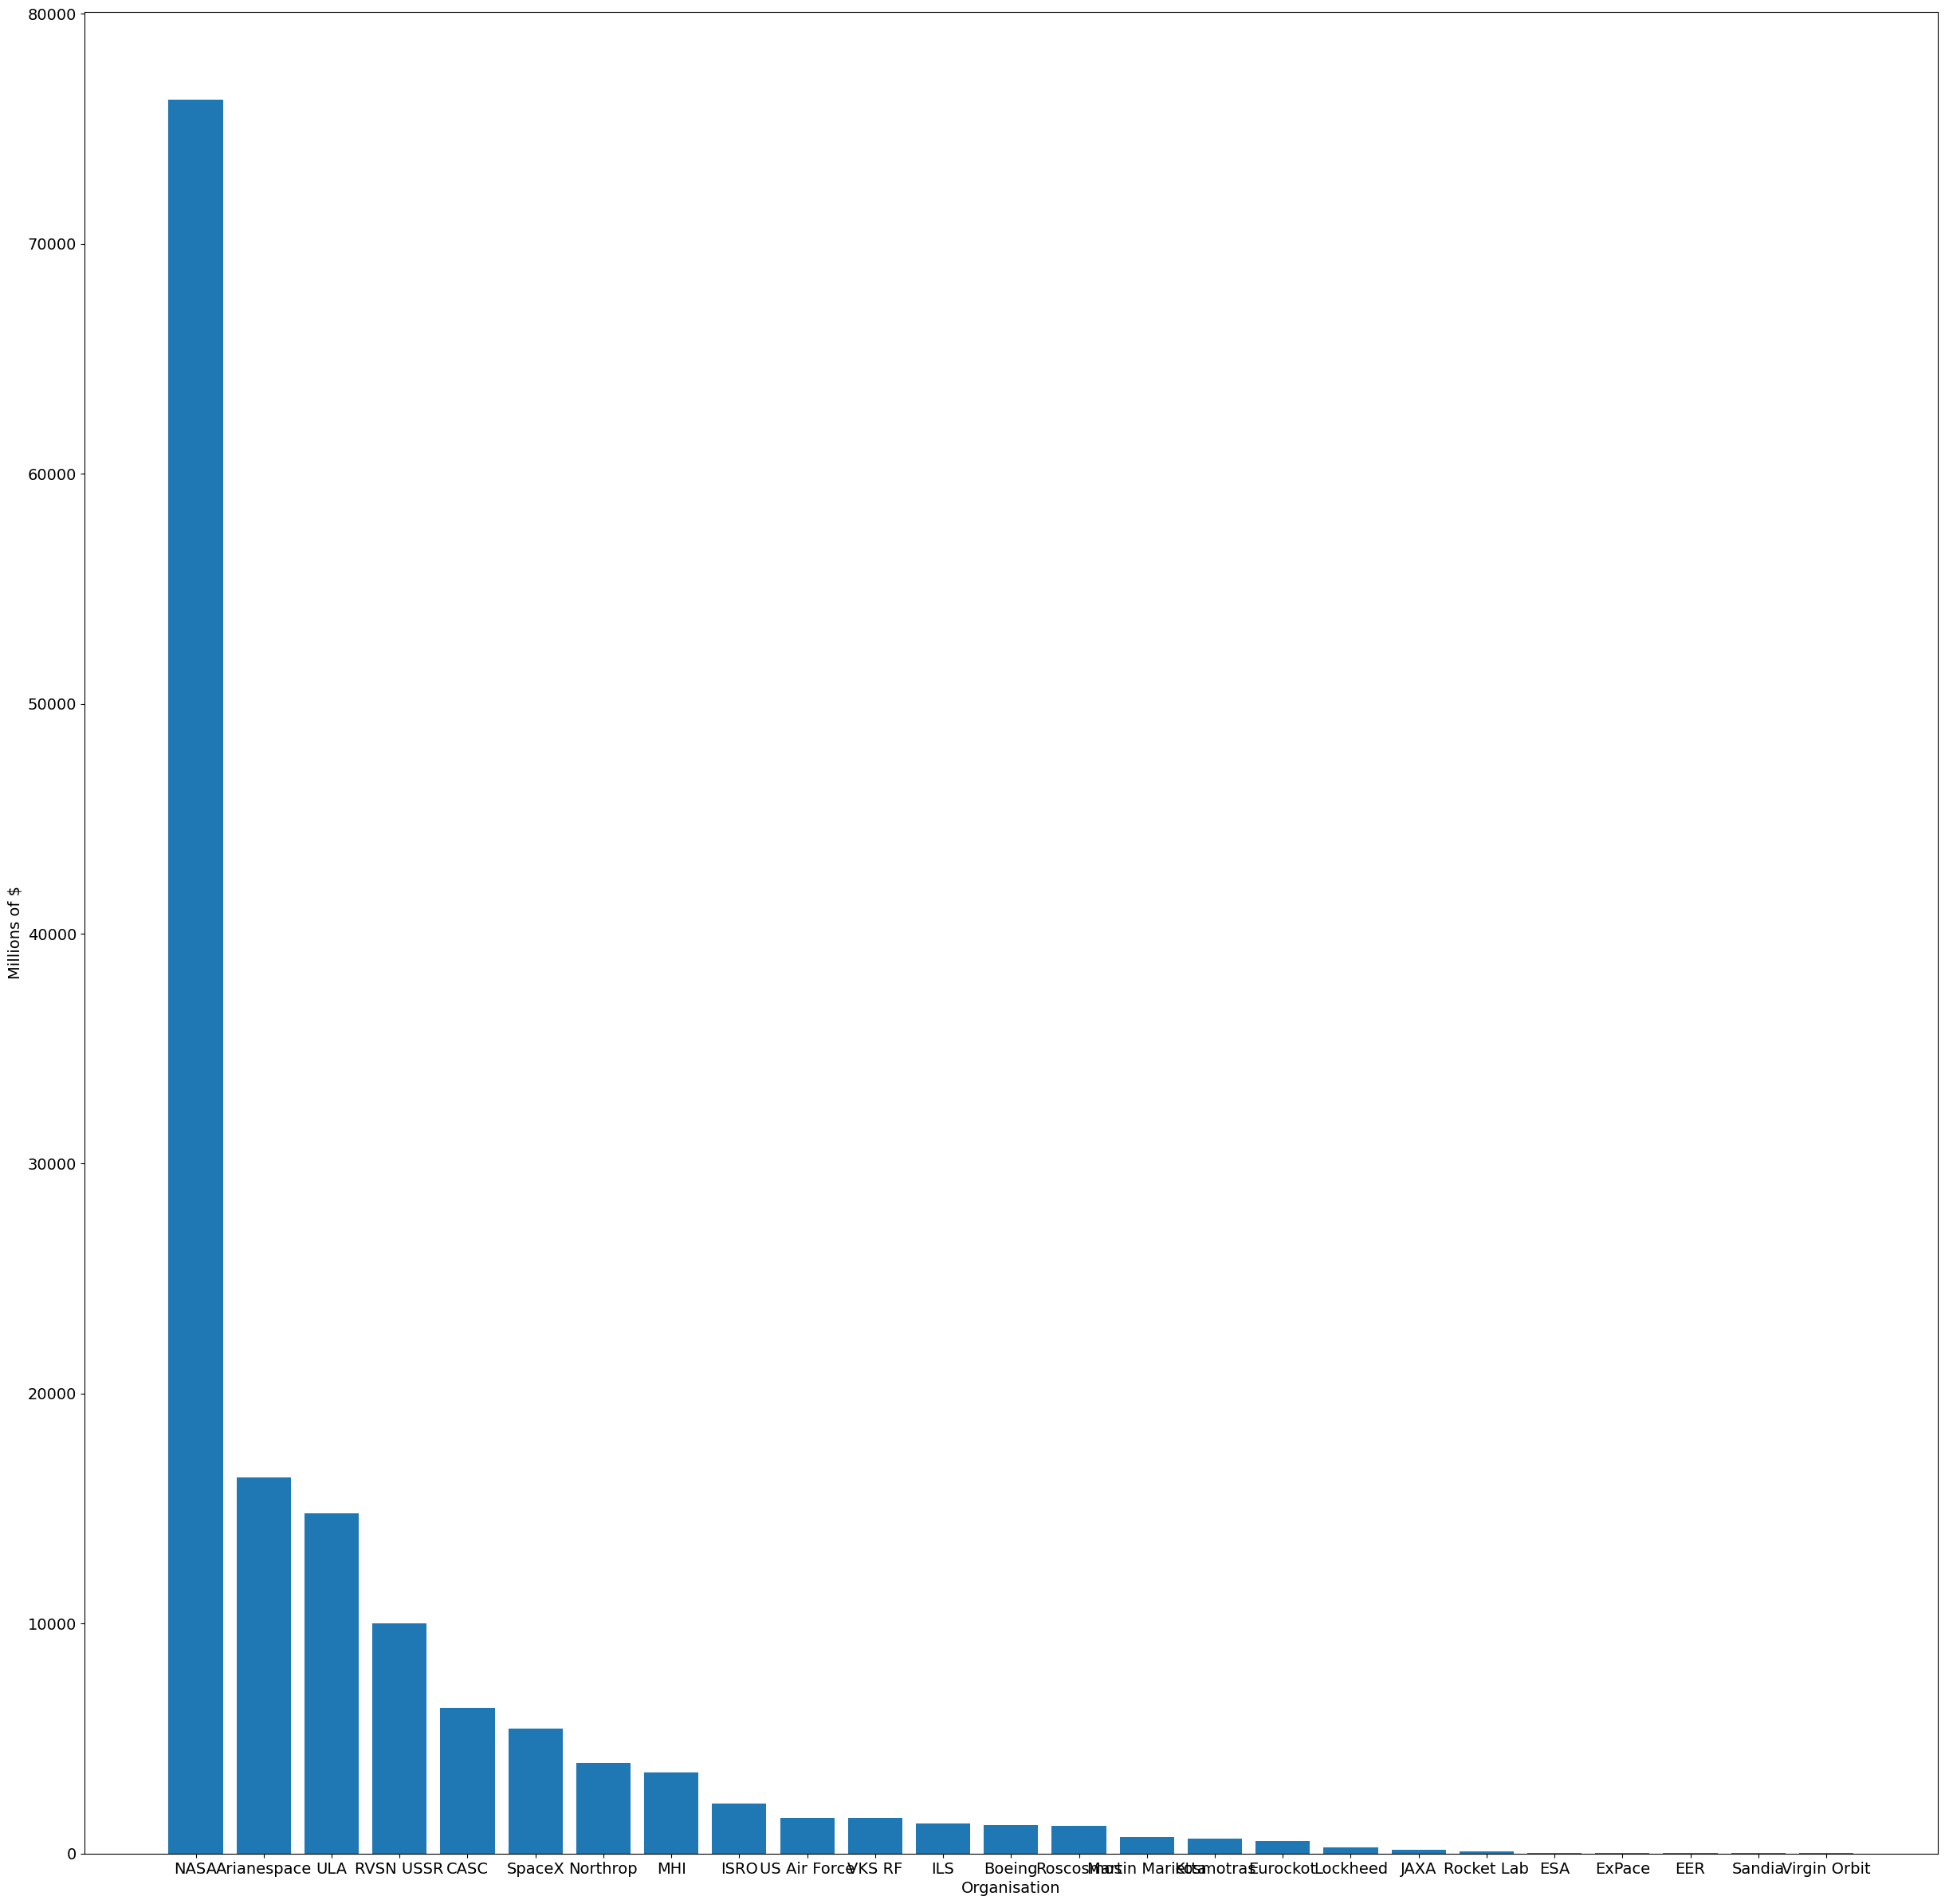

In [ ]:
plt.figure(figsize=(30, 30))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Organisation', fontsize=14)
plt.ylabel('Millions of $', fontsize=14)

plt.bar(price_comparison.index, price_comparison['Price'])

plt.show()

In [ ]:
short_price_list = price_comparison.head()

Text(0.5, 1.0, 'Pencentage of Spending by Organisation')

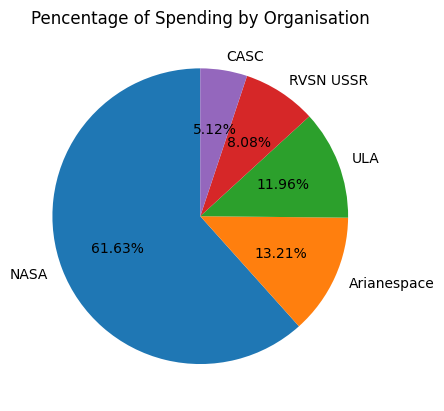

In [ ]:
plt.pie(short_price_list['Price'], labels=short_price_list.index,autopct = '%1.2f%%',  startangle = 90
        )

plt.title('Pencentage of Spending by Organisation')

In [ ]:
reshaped_df2['Date'] = reshaped_df2['Date'].astype(str).str[0:7]

<ipython-input-143-d9006e5e61ae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reshaped_df2['Date'] = reshaped_df2['Date'].astype(str).str[0:7]


In [ ]:
reshaped_df3 = reshaped_df2.pivot_table(index='Date', columns='Organisation', values='Price', aggfunc='sum')

In [ ]:
for col in reshaped_df3:
  reshaped_df3[col] = reshaped_df3[col].fillna(0)

In [ ]:
reshaped_df3

Organisation,Arianespace,Boeing,CASC,EER,ESA,Eurockot,ExPace,ILS,ISRO,JAXA,...,Northrop,RVSN USSR,Rocket Lab,Roscosmos,Sandia,SpaceX,ULA,US Air Force,VKS RF,Virgin Orbit
Date,,,,,,,,,,,,,,,,,,,,,
1964-09,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,63.23,0,0
1964-12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,63.23,0,0
1965-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,63.23,0,0
1965-05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,63.23,0,0
1966-07,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,59.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04,0,0,29.15,0,0,0,0,0,0,0,...,0,0,0,48.548.5,0,50.0,0,0,0,0
2020-05,0,0,29.755.3,0,0,0,0,0,0,0,...,0,0,0,0,0,50.0,120.0,0,0,12.0
2020-06,0,0,29.1529.7530.8,0,0,0,0,0,0,0,...,0,0,7.5,0,0,50.050.050.0,0,0,0,0


In [ ]:
for col in reshaped_df3:
  reshaped_df3[[col]] = df[[col]].astype(str).astype(int)

KeyError: ignored

In [ ]:
reshaped_df3['NASA']

Date
1964-09    0
1964-12    0
1965-02    0
1965-05    0
1966-07    0
          ..
2020-04    0
2020-05    0
2020-06    0
2020-07    0
2020-08    0
Name: NASA, Length: 388, dtype: object

In [ ]:
new = reshaped_df3[['NASA', 'CASC', 'RVSN USSR', 'Roscosmos']]
new

Organisation,NASA,CASC,RVSN USSR,Roscosmos
Date,,,,
1964-09,0,0,0,0
1964-12,0,0,0,0
1965-02,0,0,0,0
1965-05,0,0,0,0
1966-07,0,0,0,0
...,...,...,...,...
2020-04,0,29.15,0,48.548.5
2020-05,0,29.755.3,0,0
2020-06,0,29.1529.7530.8,0,0


In [ ]:
new['NASA'] = nNASA
new['CASC'] = nCASC
new['RVSN USSR'] = nRVSN
new['Roscosmos'] = nRoscosmos





In [ ]:
new

Organisation,NASA,CASC,RVSN USSR,Roscosmos
Date,,,,
1964-09,0,0,0,0
1964-12,0,0,0,0
1965-02,0,0,0,0
1965-05,0,0,0,0
1966-07,0,0,0,0
...,...,...,...,...
2020-04,0,29,0,0
2020-05,0,29,0,0
2020-06,0,29,0,0


In [ ]:
for col in new.columns:
  new[col] = new[col].astype(str).str.replace(",", "")

<ipython-input-400-514a4a757935>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new[col] = new[col].astype(str).str.replace(",", "")


In [ ]:
lst= pd.Series.to_list(new['CASC'])




In [ ]:
nlst=[]
for item in lst:
  if "." in item:
    nlst.append(item.split('.')[0])
  else:
    nlst.append(item)

In [ ]:
print(nlst)

['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '30', '0', '0', '0', '30', '0', '0', '0', '0', '0', '30', '0', '0', '0', '0', '0', '0', '0', '0', '30', '0', '0', '30', '0', '30', '30', '30', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '30', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '29', '0', '30', '0', '0', '0', '0', '0', '0', '30', '0', '0', '69', '0', '0', '0', '0', '29', '0', '0', '69', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '29', '0', '0', '0', '0', '0', '69', '0', '0', '30', '0', '0', '30', '0', '0', '30', '0', '30', '0', '30', '0', '0', '30', '0', '0', '64', '30', '0', '64', '0', '69', '0', '0', '0', '0', '0', '0', '69', '0', '69', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '64', '0', '0', '0', '64', '0', '0', '0', '0', '0', '69

In [ ]:


NASA = pd.Series.to_list(new['NASA'])
CASC = pd.Series.to_list(new['CASC'])
RVSN = pd.Series.to_list(new['RVSN USSR'])
Roscosmos = pd.Series.to_list(new['Roscosmos'])

In [ ]:
print(NASA)

['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1160.0', '0', '0', '0', '1160.0', '0', '0', '0', '1160.0', '0', '1160.0', '0', '1160.0', '0', '1160.0', '1160.0', '1160.0', '1160.0', '1160.0', '1160.0', '1160.0', '1160.0', '450.0', '450.0', '450.0', '450.0', '0', '450.0', '450.0', '450.0', '0', '450.0', '450.0', '450.0', '450.0', '450.0', '0', '450.0', '450.0', '450.0', '450.0', '450.0', '450.0', '450.0', '450.0', '450.0', '450.0450.0', '450.0450.0', '0', '0', '0', '0', '0', '450.0', '0', '450.0', '450.0', '450.0', '450.0', '0', '450.0', '450.0', '450.0', '450.0', '0', '450.0', '0', '450.0', '450.0', '450.0', '450.0450.0', '450.0', '0', '450.0', '450.0', '450.0', '450.0', '450.0', '0', '450.0', '450.0', '450.0', '0', '450.0', '450.0', '450.0', '450.0', '0', '450.0450.0', '450.0', '450.0', '450.0', '450.0', '0', '450.0', '450.0', '450.0', '0', '0', '450.0', '450.0450.0', '0', '450.0', '450.0', '450.0', '0', '450.0', '450.0', '450.0', '450.0', '450.0', '450.0', '450.0',

THIS IS WHERE YOU LEFT OFF

In [ ]:
nNASA = []
nCASC = []
nRVSN = []
nRoscosmos = []


for item in NASA:
  if "." in item:
    nNASA.append(item.split('.')[0])
  else:
    nNASA.append(item)

for item in CASC:
  if "." in item:
    nCASC.append(item.split('.')[0])
  else:
    nCASC.append(item)

for item in NASA:
  if "." in item:
    nRVSN.append(item.split('.')[0])
  else:
    nRVSN.append(item)

for item in NASA:
  if "." in item:
    nRoscosmos.append(item.split('.')[0])
  else:
    nRoscosmos.append(item)

In [ ]:
new1.dtypes

Organisation
NASA         object
CASC         object
RVSN USSR    object
Roscosmos    object
dtype: object

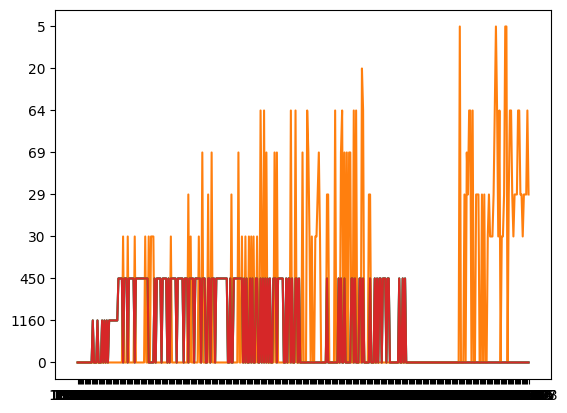

In [ ]:



for column in new:
    plt.plot(new.index, new[column])

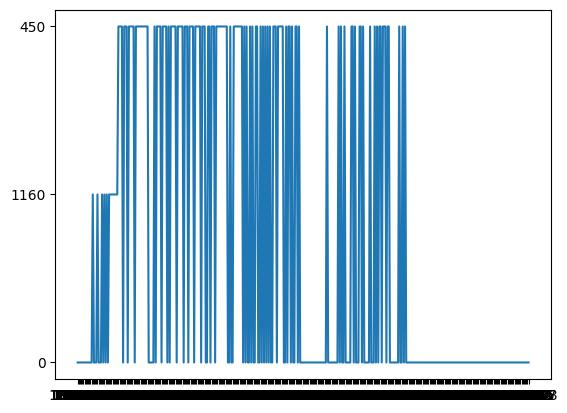

In [ ]:
plt.plot(new.index, new['NASA'])

In [ ]:
new = new.reset_index()
new['Date'] = new['Date'].astype(str).str[0:4]


In [ ]:
new

Organisation,Date,NASA,CASC,RVSN USSR,Roscosmos
0,1964,0,0,0,0
1,1964,0,0,0,0
2,1965,0,0,0,0
3,1965,0,0,0,0
4,1966,0,0,0,0
...,...,...,...,...,...
383,2020,0,29,0,0
384,2020,0,29,0,0
385,2020,0,29,0,0
386,2020,0,64,0,0


In [ ]:
for col in new:
  new[col] = pd.to_numeric(new[col])


In [ ]:
new = new.groupby('Date').sum()

In [ ]:
new

Organisation,NASA,CASC,RVSN USSR,Roscosmos
Date,,,,
1964,0,0,0,0
1965,0,0,0,0
1966,0,0,0,0
1967,1160,0,1160,1160
1968,2320,0,2320,2320
1969,4640,0,4640,4640
1970,1160,0,1160,1160
1971,2320,0,2320,2320
1972,2320,0,2320,2320


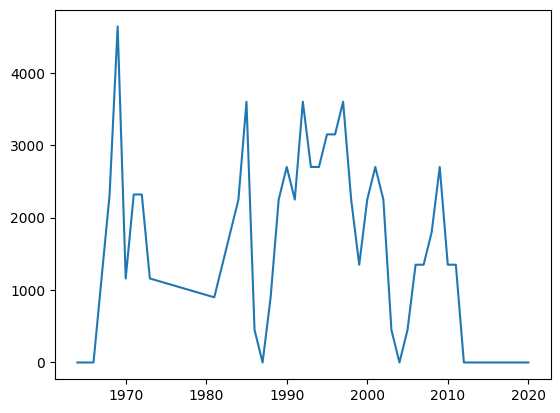

In [ ]:


plt.plot(new.index, new['NASA'])

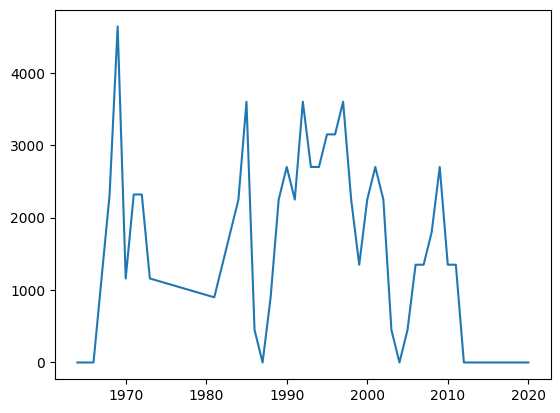

In [ ]:
plt.plot(new.index, new['RVSN USSR'])
